In [52]:
import numpy as np
import pandas as pd

In [53]:
DATAPATH = 'data/wine_dataset.csv'
data = pd.read_csv(DATAPATH)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [54]:
#lets categorize the quality column
#bad = 0, ok = 1, good = 2
data2 = data.copy()
def categorize_quality(x):
    for i, val in enumerate(x.values):
        if val <= 5:
            data2.loc[i, 'quality'] = 'bad'
        elif val >= 6 and val <= 7:
            data2.loc[i, 'quality'] = 'ok'
        elif val >= 8:
            data2.loc[i, 'quality'] = 'good'
        else:
            print('wrong value {}', i)
            
categorize_quality(data2['quality'])

In [55]:
#data['quality'] = pd.factorize(data['quality'])[0]
data2['quality'].value_counts()

ok      3915
bad     2384
good     198
Name: quality, dtype: int64

as we can seen above the distribution of data between 3 categories i.e. bad, ok, good is unbalanced, so I am considering 7 also has good quaity parameter and only 6 as average (ok) quality

In [56]:
def categorize_quality(x):
    for i, val in enumerate(x.values):
        if val <= 5:
            data.loc[i, 'quality'] = 'bad'
        elif val == 6:
            data.loc[i, 'quality'] = 'ok'
        elif val >= 7:
            data.loc[i, 'quality'] = 'good'
        else:
            print('wrong value {}', i)
            
categorize_quality(data['quality'])

In [57]:
data['quality'].value_counts()

ok      2836
bad     2384
good    1277
Name: quality, dtype: int64

now we can see that the data distribution is looks kind of balanced, so we'll move forward 

In [58]:
data['quality'] = pd.factorize(data['quality'])[0]

 we have done one-hot encoding in basic preprocessing, so instead of that label encoding for style column

In [59]:
data['style'].value_counts()

white    4898
red      1599
Name: style, dtype: int64

In [60]:
data['style'] = pd.factorize(data['style'])[0]

In [61]:
data['style'].value_counts() #1-white, 0-red

1    4898
0    1599
Name: style, dtype: int64

In [62]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


### Lets explore Deep into red and wine features importance and understand the correlation

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
data_red = data[data['style']==0]
data_white = data[data['style']==1]

In [66]:
data_red['style'].value_counts()

0    1599
Name: style, dtype: int64

In [67]:
data_white['style'].value_counts()

1    4898
Name: style, dtype: int64

#### Fixed acidity

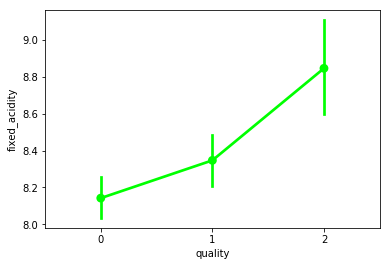

In [71]:
sns.pointplot(x='quality',y='fixed_acidity',data=data_red,color='lime',alpha=0.8)

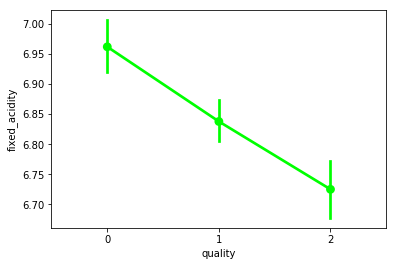

In [72]:
sns.pointplot(x='quality',y='fixed_acidity',data=data_white,color='lime',alpha=0.8)

As we can see from the above two figures, fixed_acidity is increasing against quality for red wine but vice-versa for white wine

#### Volatile acidity 

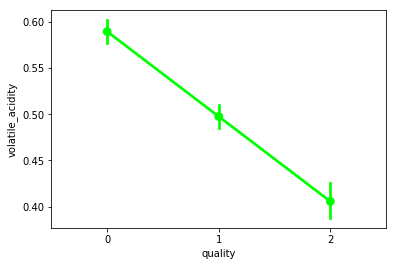

In [73]:
sns.pointplot(x='quality',y='volatile_acidity',data=data_red,color='lime',alpha=0.8)

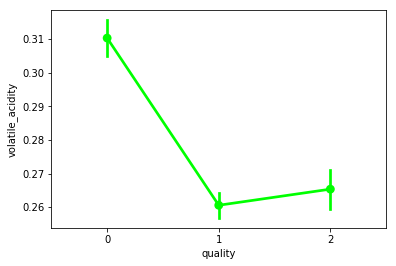

In [74]:
sns.pointplot(x='quality',y='volatile_acidity',data=data_white,color='lime',alpha=0.8)

volatile acidity is low for good quality for both red and white wine, but it is low for all categories in white wine and high for bad and ok categoreis in red wine.

#### Citric Acid

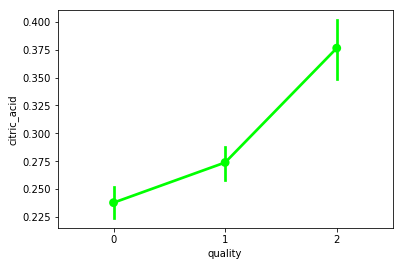

In [75]:
sns.pointplot(x='quality',y='citric_acid',data=data_red,color='lime',alpha=0.8)

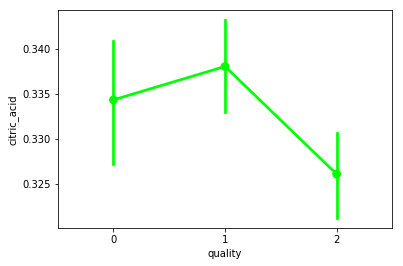

In [76]:
sns.pointplot(x='quality',y='citric_acid',data=data_white,color='lime',alpha=0.8)

Citric acid also has distinct behaviour compared between red and white wine. low for white wine for good quality but high for red wine

### Residual Sugar

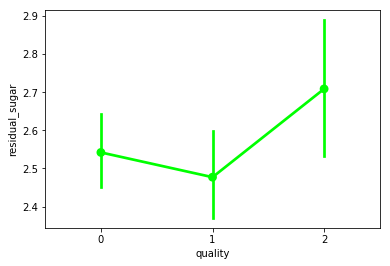

In [77]:
sns.pointplot(x='quality',y='residual_sugar',data=data_red,color='lime',alpha=0.8)

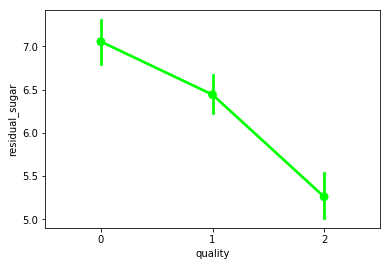

In [78]:
sns.pointplot(x='quality',y='residual_sugar',data=data_white,color='lime',alpha=0.8)

residual sugar also has distinct behaviour compared between red and white wine. low for white wine for good quality but high for red wine

#### chlorides

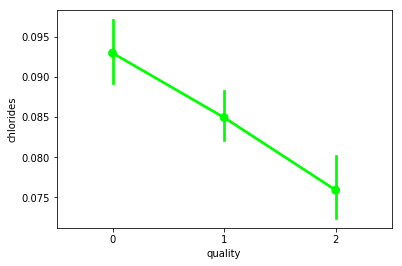

In [80]:
sns.pointplot(x='quality',y='chlorides',data=data_red,color='lime',alpha=0.8)

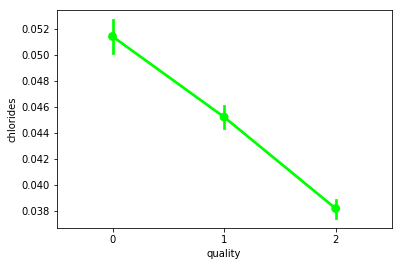

In [81]:
sns.pointplot(x='quality',y='chlorides',data=data_white,color='lime',alpha=0.8)

for first time, one feature decreased or increased with quality for both red wine and white wine. Both having unique beaviour and for good quality wine we need less chloride

#### free_sulfur_dioxide

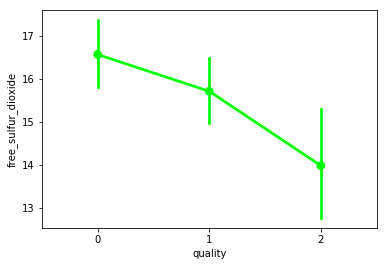

In [82]:
sns.pointplot(x='quality',y='free_sulfur_dioxide',data=data_red,color='lime',alpha=0.8)

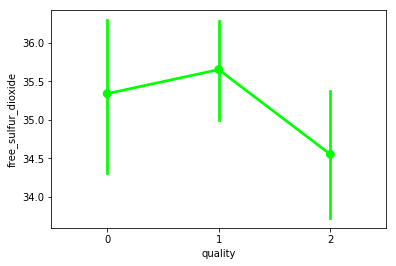

In [83]:
sns.pointplot(x='quality',y='free_sulfur_dioxide',data=data_white,color='lime',alpha=0.8)

Kind of unique behaviour but white wine for good quality uses more amount of free_sugar_dioxide but not red wine.
The lesser the good quality

### total_sulfur_dioxide

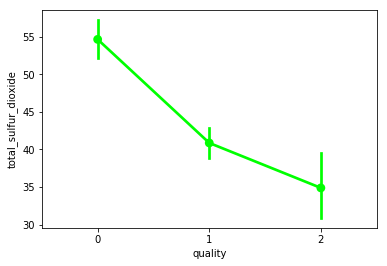

In [86]:
sns.pointplot(x='quality',y='total_sulfur_dioxide',data=data_red,color='lime',alpha=0.8)

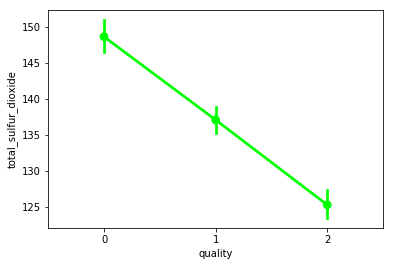

In [87]:
sns.pointplot(x='quality',y='total_sulfur_dioxide',data=data_white,color='lime',alpha=0.8)

similar to free_sulfur dioxide , but not entirly unique behaviour for both red and white wine. The lesser the value the better the quality

### density

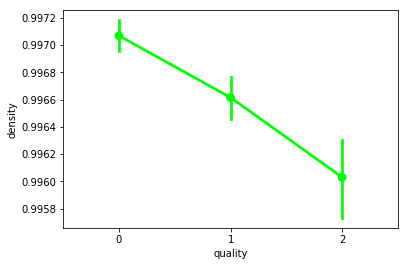

In [88]:
sns.pointplot(x='quality',y='density',data=data_red,color='lime',alpha=0.8)

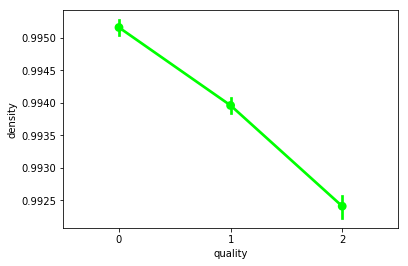

In [89]:
sns.pointplot(x='quality',y='density',data=data_white,color='lime',alpha=0.8)

very straight feature the lesser the better for quality for both red and white wine. Unique characteristics

#### pH

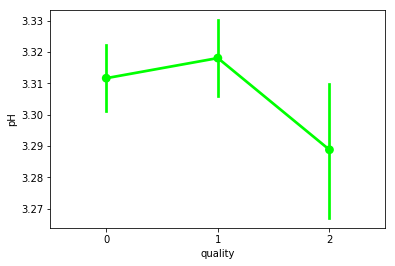

In [91]:
sns.pointplot(x='quality',y='pH',data=data_red,color='lime',alpha=0.8)

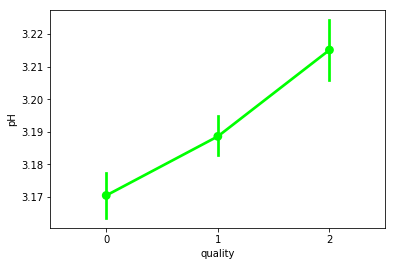

In [92]:
sns.pointplot(x='quality',y='pH',data=data_white,color='lime',alpha=0.8)

Not unique behaviour for white wine having more pH score is good for better product but for red wine need lesser score for good quality

#### sulphates

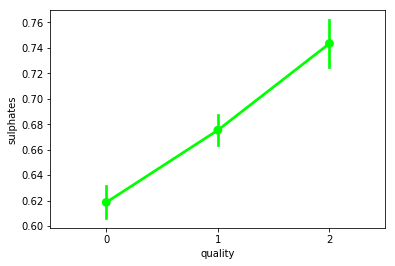

In [96]:
sns.pointplot(x='quality',y='sulphates',data=data_red,color='lime',alpha=0.8)

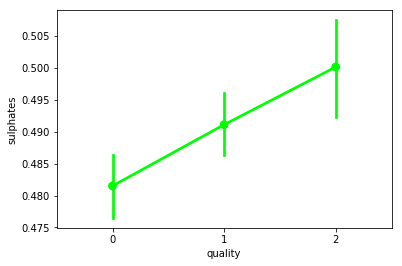

In [97]:
sns.pointplot(x='quality',y='sulphates',data=data_white,color='lime',alpha=0.8)

very straight feature the more the better for quality for both red and white wine. Unique characteristics

#### alcohol

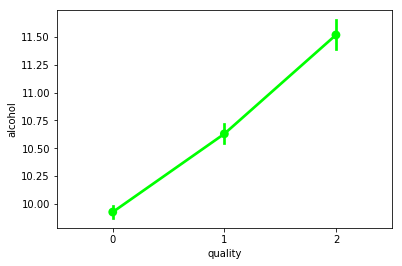

In [98]:
sns.pointplot(x='quality',y='alcohol',data=data_red,color='lime',alpha=0.8)

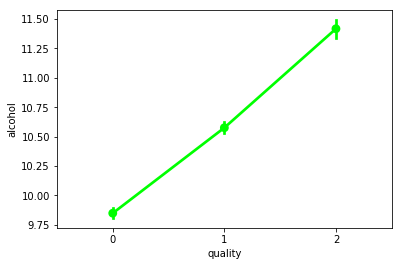

In [99]:
sns.pointplot(x='quality',y='alcohol',data=data_white,color='lime',alpha=0.8)

very straight feature the more the better for quality for both red and white wine. Unique characteristics

### Inference Details from the dataset

As we can see from the above all diagrams features such as alcohol, sulphates, density, total_sulfur_dioxide, 
free_sulfur_dioxide, chlorides as _similar behaviour_ while rest of the features such as fixed_acidity, volatile_acidity,
citric_acid, residual_sugar, pH doesn't have _unique behaviour_ between red wine and white wine

**fixed_acidity** - Not unique behaviour, fixed_acidity is increasing against quality for red wine but vice-versa for white wine 

**volatile_acidity** - volatile acidity is low for good quality for both red and white wine, but it is low for all categories in white wine and high for bad and ok categoreis in red wine.

**citric_acid** - Citric acid also has distinct behaviour compared between red and white wine. low for white wine for good quality but high for red wine

**residual_sugar** - residual sugar also has distinct behaviour compared between red and white wine. low for white wine for good quality but high for red wine

**pH** - Not unique behaviour for white wine having more pH score is good for better product but for red wine need lesser score for good quality

**free_sulfur_dioxide** - Kind of unique behaviour but white wine for good quality uses more amount of free_sugar_dioxide but not red wine. The lesser the good quality

**total_sulfur_dioxide** - similar to free_sulfur dioxide , but not entirly unique behaviour for both red and white wine. The lesser the value the better the quality

**chlorides** - feature decreased or increased with quality for both red wine and white wine. Both having unique beaviour and for good quality wine we need less chloride

**density** - very straight feature the lesser the better for quality for both red and white wine. Unique characteristics

**sulphates** - very straight feature the more the better for quality for both red and white wine. Unique characteristics

**alcohol** - very straight feature the more the better for quality for both red and white wine. Unique characteristics

#### Normalize data

In [102]:
#as each feature has diff ranges, lets normalize it
def normalize(x):
    min_x = min(x)
    max_x = max(x)
    return (x - min_x)/(max_x - min_x)

In [103]:
cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for col in cols:
    new_col_name = 'norm_'+col
    data[new_col_name] = normalize(data[col])

In [105]:
data.head().T

,0,1,2,3,4
fixed_acidity,7.400000,7.800000,7.800000,11.200000,7.400000
volatile_acidity,0.700000,0.880000,0.760000,0.280000,0.700000
citric_acid,0.000000,0.000000,0.040000,0.560000,0.000000
residual_sugar,1.900000,2.600000,2.300000,1.900000,1.900000
chlorides,0.076000,0.098000,0.092000,0.075000,0.076000
free_sulfur_dioxide,11.000000,25.000000,15.000000,17.000000,11.000000
total_sulfur_dioxide,34.000000,67.000000,54.000000,60.000000,34.000000
density,0.997800,0.996800,0.997000,0.998000,0.997800
pH,3.510000,3.200000,3.260000,3.160000,3.510000
sulphates,0.560000,0.680000,0.650000,0.580000,0.560000


In [106]:
#lets drop columns some columns as we have transformed those columns into new values
data.columns
drop_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

data.drop(drop_cols, axis=1, inplace=True)

In [107]:
data.head().T

,0,1,2,3,4
quality,0.000000,0.000000,0.000000,1.000000,0.000000
style,0.000000,0.000000,0.000000,0.000000,0.000000
norm_fixed_acidity,0.297521,0.330579,0.330579,0.611570,0.297521
norm_volatile_acidity,0.413333,0.533333,0.453333,0.133333,0.413333
norm_citric_acid,0.000000,0.000000,0.024096,0.337349,0.000000
norm_residual_sugar,0.019939,0.030675,0.026074,0.019939,0.019939
norm_chlorides,0.111296,0.147841,0.137874,0.109635,0.111296
norm_free_sulfur_dioxide,0.034722,0.083333,0.048611,0.055556,0.034722
norm_total_sulfur_dioxide,0.064516,0.140553,0.110599,0.124424,0.064516
norm_density,0.206092,0.186813,0.190669,0.209948,0.206092


In [109]:
data.shape

(6497, 13)

In [110]:
#lets save the data into a csv
data.to_csv('data/final_preprocessed.csv')